## **USING AUTOENCODERS IN H20 with PYTHON**

An Autoencoder is a data compression algorithm which takes the input and going through a compressed representation and gives the reconstructed output.


The auto-encoder is an unsupervised method. There is no target feature you’re trying to predict, what you’re trying to do is find a low-dimensional representation of the inputs instead.

It is worth noting that auto-encoders are often used in supervised learning; you train an auto-encoder on the inputs alone, and then use the low-dimensional encoding as inputs to the supervised learning network. This is not dissimilar to first using PCA to reduce the dimensionality, and then training a prediction model on the reduced dimensionality inputs.

### **Credit Card Fraud Detection using Autoencoders in H2O**

In [3]:
import h2o
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [4]:
h2o.init(max_mem_size = 2) # initializing h2o server
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_181"; Java(TM) SE Runtime Environment (build 1.8.0_181-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /home/erikapat/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5kszifyv
  JVM stdout: /tmp/tmp5kszifyv/h2o_erikapat_started_from_python.out
  JVM stderr: /tmp/tmp5kszifyv/h2o_erikapat_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Madrid
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,2 months and 6 days
H2O cluster name:,H2O_from_python_erikapat_z4tdv0
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [8]:
creditData = pd.read_csv("data/creditcard.csv") 
creditData.describe()
# H2O method
# creditData_df = h2o.import_file(r"File_Path\creditcard.csv") 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#missing values
creditData.isnull().values.any() # pandas method
# creditData_h2o.na_omit() # h2o method
# creditData_h2o.nacnt() # no missing values found

False

Parse progress: |█████████████████████████████████████████████████████████| 100%


Text(0, 0.5, 'Frequency')

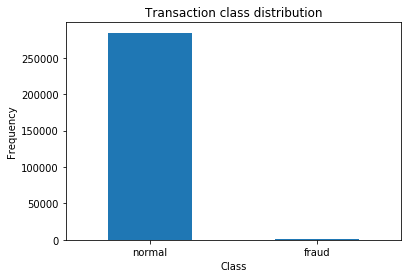

In [11]:
# Turns python pandas frame into an H2OFrame
creditData_h2o  = h2o.H2OFrame(creditData)
# Let’s plot the Transaction class against the Frequency
labels = ['normal','fraud']
classes = pd.value_counts(creditData['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title('Transaction class distribution')
plt.xticks(range(2), labels)
plt.xlabel('Class')
plt.ylabel('Frequency')

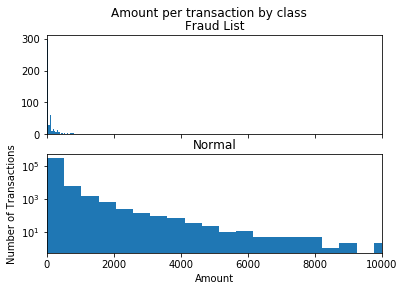

In [12]:
fraud = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
# Amount vs Class
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud List')
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

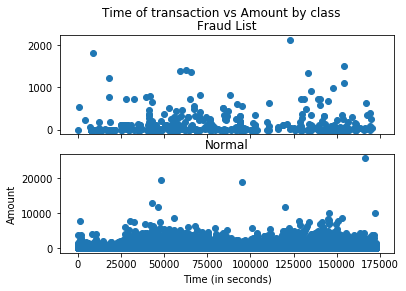

In [13]:
# time vs Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud List')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

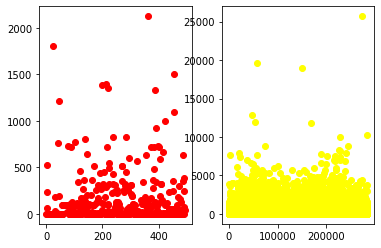

In [14]:
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}
fraudlist = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
fig,axes = plt.subplots(1,2)
axes[0].scatter(list(range(1,fraudlist.shape[0] + 1)), fraudlist.Amount,color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount,color='yellow')
plt.show()

In [15]:
features= creditData_h2o.drop(['Time'], axis=1)

In [16]:
train, test = features.split_frame([0.8])
print(train.shape)
print(test.shape)

(228026, 30)
(56781, 30)


## **TRAIN AND TEST SET**

* As we saw  before our dataset has a lot of non-fraud transactions. Because of this for **the model training**, we only send non-fraud transactions. So that the model will learn the pattern of normal transactions.

* On the other hand the **testing set** has both normal and fraud transactions in it. The Autoencoder will learn to identify the pattern of the input data and if an anomalous test point does not match the learned pattern, the autoencoder will likely have a high error rate in reconstructing this data, indicating anomalous data. So that we can identify the anomalies of the data. To calculate the error, it uses Mean Squared Error(MSE)

In [17]:
# converting to pandas dataframe
train_df = train.as_data_frame()
test_df = test.as_data_frame()
train_df = train_df[train_df['Class'] == 0]
# drop the Class variable
train_df = train_df.drop(['Class'], axis=1)
Y_test_df = test_df['Class'] # true labels of the testing set
test_df = test_df.drop(['Class'], axis=1)
train_df.shape

(227640, 29)

In [18]:
train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## **DEEP NEURAL NETWORK**
When building the model, 4 fully connected hidden layers were chosen with, [14,7,7,14] number of nodes for each layer. First two for the encoder and last two for the decoder.

In [32]:
anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                               hidden = [14,7,7,14],
                               epochs = 100,
                               standardize = True,
                                stopping_metric = 'MSE', 
                                loss = 'automatic',
                                train_samples_per_iteration = 32,
                                shuffle_training_data = True,     
                               autoencoder = True,
                               l1 = 10e-5)
anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [20]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,V26,1.000000,1.000000,0.143494
1,V24,0.997740,0.997740,0.143170
2,V15,0.993420,0.993420,0.142550
3,V19,0.993140,0.993140,0.142510
4,V18,0.987423,0.987423,0.141689
5,V11,0.983607,0.983607,0.141142
6,V13,0.974531,0.974531,0.139839
7,V12,0.012759,0.012759,0.001831
8,V4,0.009189,0.009189,0.001319
9,V16,0.002920,0.002920,0.000419


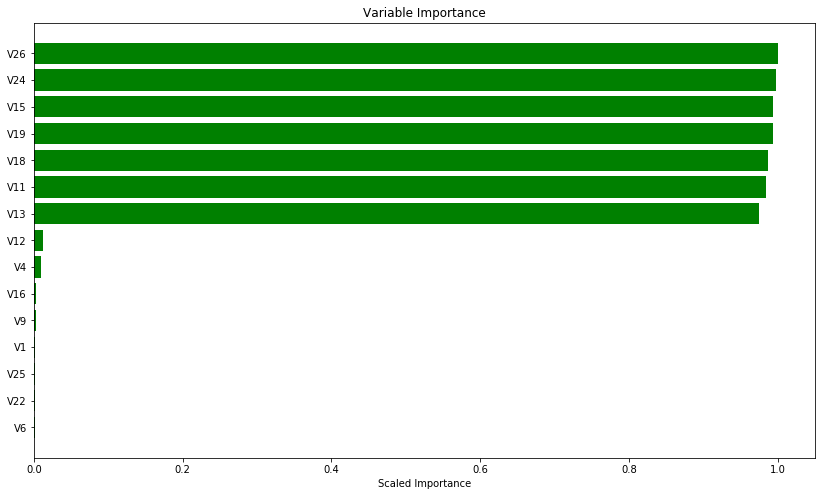

In [21]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

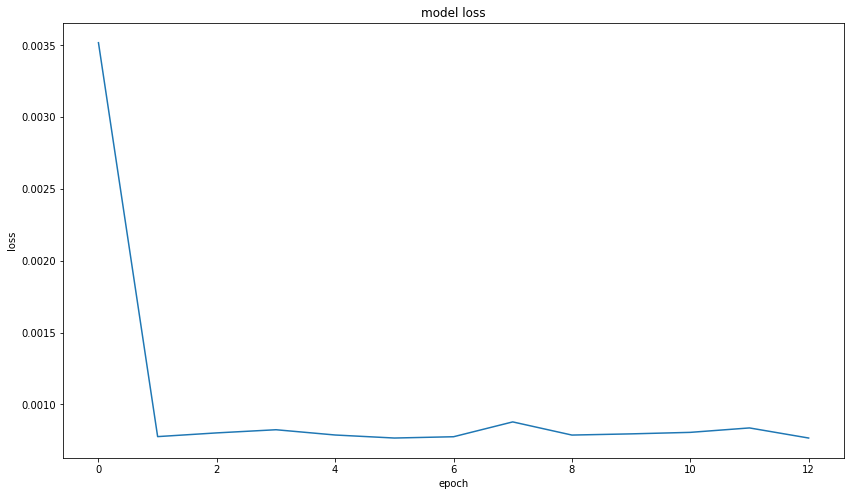

In [22]:
# plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
test_rec_error = anomaly_model.anomaly(test_h2o) 

In [36]:
test_rec_error

Reconstruction.MSE
0.000412292
0.00140836
0.000139557
0.000210984
0.000424349
0.000371345
0.00149089
0.000481953
0.000245573
0.000132964


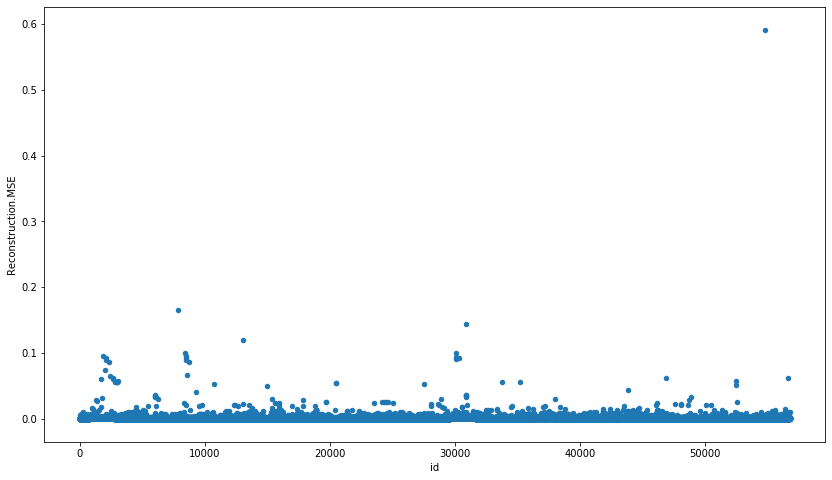

In [23]:
# anomaly is a H2O function which calculates the error for the dataset
# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()
# plotting the testing dataset against the error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [24]:
# predicting the class for the testing dataset
predictions = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,56781.000000,56781.000000
mean,0.000839,0.001867
std,0.003472,0.043167
min,0.000042,0.000000
25%,0.000302,0.000000
50%,0.000495,0.000000
75%,0.000898,0.000000
max,0.591091,1.000000


In [35]:
error_df

,reconstruction_error,true_class
0,0.000412,0
1,0.001408,0
2,0.000140,0
3,0.000211,0
4,0.000424,0
...,...,...
56776,0.000290,0
56777,0.000420,0
56778,0.010440,0
56779,0.000216,0


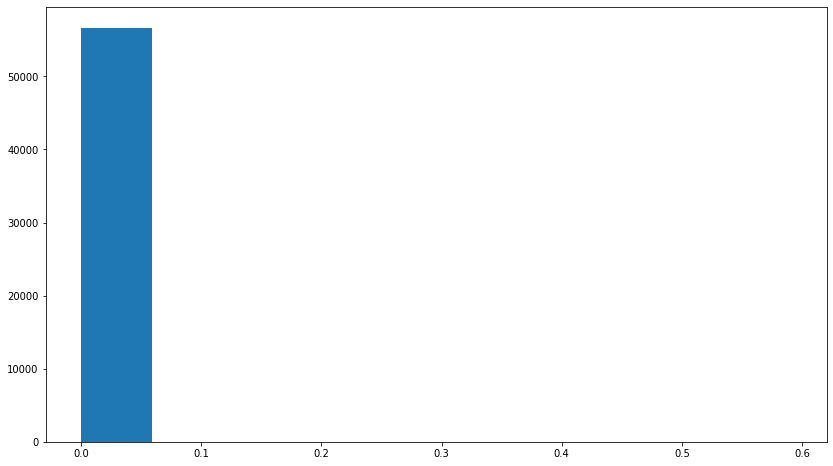

In [25]:
# reconstruction error for the normal transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

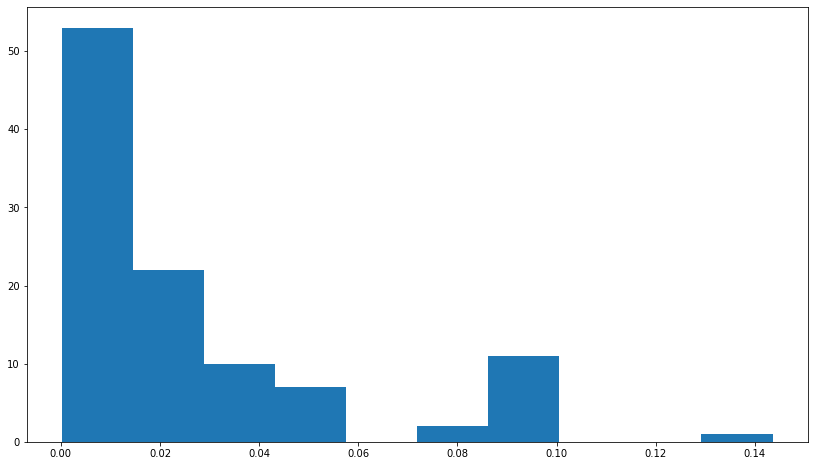

In [26]:
# reconstruction error for the fraud transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

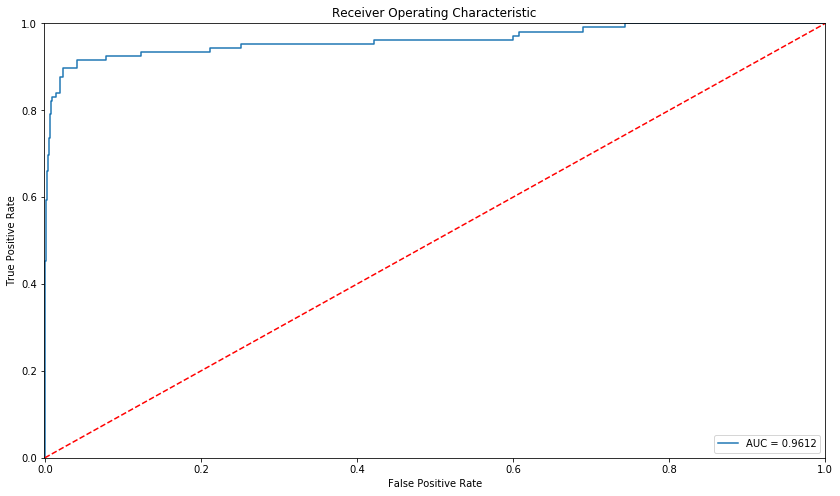

In [27]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**References**
* https://towardsdatascience.com/credit-card-fraud-detection-using-autoencoders-in-h2o-399cbb7ae4f1